In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [139]:
import datetime as dt
from functools import reduce
import tensorflow as tf

In [145]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Flatten

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [391]:
from keras.layers import Dense, LSTM, Activation
import random as python_random

### Creating the dataset by adding additional variables:
- *T-bill 3 months*
- *T-bill 6 months*
- *Trimmed mean PCE inflation*
- *UK government bond yield*
- *Oil prices*
- *S&P 500 prices*
- *Federal funds rate*
- *US/UK exchange rate*

In [70]:
gold = pd.read_table(r"C:\Users\samas\Downloads\goldrates2019.txt")

In [125]:
gold["d"] = pd.to_datetime(gold["Month"])

In [73]:
tb_3 = pd.read_csv(r"C:\Users\samas\Downloads\TB3MS.csv")

In [124]:
tb_3['d'] = pd.to_datetime(tb_3["DATE"])
tb_3['d'] = tb_3['d'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))
tb_3['d'] = pd.to_datetime(tb_3['d'])

In [75]:
tb_6 = pd.read_csv(r"C:\Users\samas\Downloads\TB6MS.csv")

In [123]:
tb_6['d'] = pd.to_datetime(tb_6["DATE"])
tb_6['d'] = tb_6['d'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))
tb_6['d'] = pd.to_datetime(tb_6['d'])

In [77]:
infl = pd.read_csv(r"C:\Users\samas\Downloads\PCETRIM12M159SFRBDAL.csv")

In [122]:
infl['d'] = pd.to_datetime(infl["DATE"])
infl['d'] = infl['d'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))
infl['d'] = pd.to_datetime(infl['d'])

In [79]:
uk_gvt_bd = pd.read_csv(r"C:\Users\samas\Downloads\INTGSBGBM193N.csv")

In [121]:
uk_gvt_bd['d'] = pd.to_datetime(uk_gvt_bd["DATE"])
uk_gvt_bd['d'] = uk_gvt_bd['d'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))
uk_gvt_bd['d'] = pd.to_datetime(uk_gvt_bd['d'])

In [81]:
oil = pd.read_csv(r"C:\Users\samas\Downloads\MCOILWTICO.csv")

In [120]:
oil['d'] = pd.to_datetime(oil["DATE"])
oil['d'] = oil['d'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m'))
oil['d'] = pd.to_datetime(oil['d'])


In [83]:
spy = pd.read_csv(r"C:\Users\samas\Downloads\sp500_prices.csv")

In [84]:
spy["d"] = pd.to_datetime(spy["Date"])

In [86]:
ffr = pd.read_csv(r"C:\Users\samas\Downloads\FEDFUNDS.csv")

In [119]:
ffr["d"] = pd.to_datetime(ffr["DATE"])


In [88]:
ex = pd.read_csv(r"C:\Users\samas\Downloads\EXUSUK.csv")

In [118]:
ex['d'] = pd.to_datetime(ex["DATE"])


### Mergeing all the dataframes into two final datasets:
- *df1*: All the variables
- *df2*: All except oil

In [117]:
dfs = [gold,tb_3, tb_6, infl, uk_gvt_bd, oil, spy, ffr, ex]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['d'],
                                            how='outer'), dfs)

In [101]:
df1 = df_merged.dropna()

In [102]:
df1 = df1.drop(columns = ["DATE_x", "DATE_y", "DATE_x", "DATE_y", "DATE_x", "Date", "DATE_y", "DATE"])

In [115]:
df1 = df1.reset_index()

In [126]:
dfs_no = [gold,tb_3, tb_6, infl, uk_gvt_bd, spy, ffr, ex]
df_merged_no = reduce(lambda  left,right: pd.merge(left,right,on=['d'],
                                            how='outer'), dfs_no)

In [109]:
df2 = df_merged_no.dropna()

In [112]:
df2 = df2.drop(columns = ["DATE_x", "DATE_y", "DATE_x", "DATE_y", "DATE_x", "Date", "DATE_y", "DATE_x"])

In [116]:
df2 = df2.reset_index()

In [127]:
df1

,index,Month,Price,d,tbill_3m,tbill_6m,inf_pce,uk_govt_bonds,oil,Value,FEDFUNDS,EXUSUK
0,432,1986-01,345.56,1986-01-01,7.07,7.16,3.72,11.1300,22.93,208.20,8.14,1.4244
1,433,1986-02,339.05,1986-02-01,7.06,7.11,3.47,10.7300,15.46,219.40,7.86,1.4297
2,434,1986-03,346.10,1986-03-01,6.56,6.57,3.28,9.6900,12.61,232.30,7.48,1.4674
3,435,1986-04,340.72,1986-04-01,6.06,6.08,3.33,8.9400,12.84,238.00,6.99,1.4985
4,436,1986-05,342.33,1986-05-01,6.15,6.19,3.26,9.1500,15.38,238.50,6.85,1.5211
...,...,...,...,...,...,...,...,...,...,...,...,...
429,861,2021-10,1776.85,2021-10-01,0.05,0.06,2.55,1.0830,81.48,4460.71,0.08,1.3701
430,862,2021-11,1821.76,2021-11-01,0.05,0.07,2.83,0.9394,79.15,4667.39,0.08,1.3463
431,863,2021-12,1790.43,2021-12-01,0.06,0.15,3.05,0.8375,71.71,4674.77,0.08,1.3303
432,864,2022-01,1816.02,2022-01-01,0.15,0.33,3.50,1.2051,83.22,4573.82,0.08,1.3555


In [128]:
df2

,index,Month,Price,d,tbill_3m,tbill_6m,inf_pce,uk_govt_bonds,Value,FEDFUNDS,EXUSUK
0,336,1978-01,173.21,1978-01-01,6.44,6.70,5.70,11.0600,90.25,6.70,1.9353
1,337,1978-02,178.36,1978-02-01,6.45,6.74,5.57,11.7500,88.98,6.78,1.9396
2,338,1978-03,183.77,1978-03-01,6.29,6.63,5.55,11.7200,88.82,6.79,1.9055
3,339,1978-04,175.32,1978-04-01,6.29,6.73,5.71,12.3900,92.71,6.89,1.8497
4,340,1978-05,176.19,1978-05-01,6.41,7.02,5.90,12.7200,97.41,7.36,1.8181
...,...,...,...,...,...,...,...,...,...,...,...
525,861,2021-10,1776.85,2021-10-01,0.05,0.06,2.55,1.0830,4460.71,0.08,1.3701
526,862,2021-11,1821.76,2021-11-01,0.05,0.07,2.83,0.9394,4667.39,0.08,1.3463
527,863,2021-12,1790.43,2021-12-01,0.06,0.15,3.05,0.8375,4674.77,0.08,1.3303
528,864,2022-01,1816.02,2022-01-01,0.15,0.33,3.50,1.2051,4573.82,0.08,1.3555


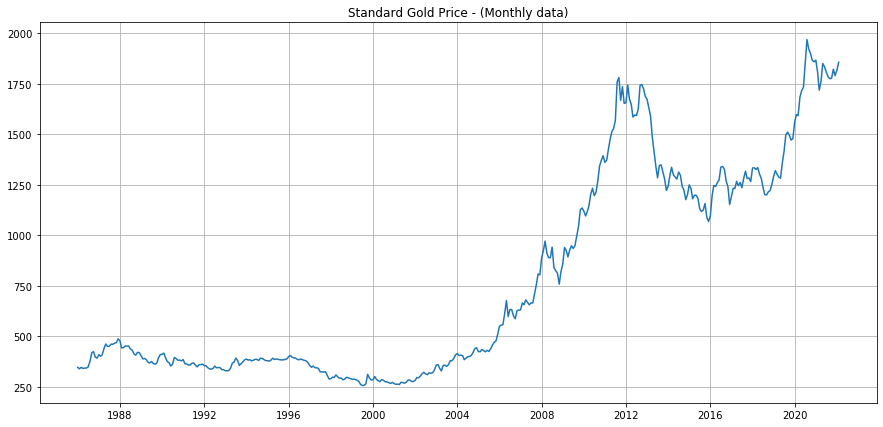

In [133]:
df1 = df1.set_index(df1["d"])
plt.figure(figsize=(15, 7))
plt.plot(df1['Price'])
plt.title('Standard Gold Price - (Monthly data)')
plt.grid(True)
plt.show()

In [147]:
df1.rename(columns={"Value":"spy"}, inplace = True)

In [489]:
df2.rename(columns={"Value":"spy"}, inplace = True)

C:\Users\samas\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Defining a function to create 12 months lagged Gold Prices.

In [244]:
def create_lag_feature(df, no_of_mths):
    
    for month in range(1, no_of_mths+1):
        df[f"lag_{month}"] = df["Price"].shift(month)
        
    return df

In [315]:
create_lag_feature(df1, 12)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,Month,Price,d,tbill_3m,tbill_6m,inf_pce,uk_govt_bonds,oil,spy,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
d,,,,,,,,,,,,,,,,,,,,,
1986-07-01,438,1986-07,348.55,1986-07-01,5.83,5.86,3.27,9.6100,11.59,240.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-08-01,439,1986-08,376.29,1986-08-01,5.53,5.55,3.19,9.6600,15.10,245.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-09-01,440,1986-09,418.15,1986-09-01,5.21,5.35,3.20,10.2800,14.87,238.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-10-01,441,1986-10,423.86,1986-10-01,5.18,5.26,3.27,10.9200,14.90,237.40,...,348.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-11-01,442,1986-11,396.98,1986-11-01,5.35,5.41,3.20,11.0800,15.22,245.10,...,376.29,348.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,861,2021-10,1776.85,2021-10-01,0.05,0.06,2.55,1.0830,81.48,4460.71,...,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42,1866.30,1900.27
2021-11-01,862,2021-11,1821.76,2021-11-01,0.05,0.07,2.83,0.9394,79.15,4667.39,...,1785.28,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42,1866.30
2021-12-01,863,2021-12,1790.43,2021-12-01,0.06,0.15,3.05,0.8375,71.71,4674.77,...,1775.14,1785.28,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42


In [316]:
df1 = df1.dropna()

In [486]:
create_lag_feature(df2, 12)

,index,Month,Price,d,tbill_3m,tbill_6m,inf_pce,uk_govt_bonds,Value,FEDFUNDS,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,336,1978-01,173.21,1978-01-01,6.44,6.70,5.70,11.0600,90.25,6.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,337,1978-02,178.36,1978-02-01,6.45,6.74,5.57,11.7500,88.98,6.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,338,1978-03,183.77,1978-03-01,6.29,6.63,5.55,11.7200,88.82,6.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,339,1978-04,175.32,1978-04-01,6.29,6.73,5.71,12.3900,92.71,6.89,...,173.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,340,1978-05,176.19,1978-05-01,6.41,7.02,5.90,12.7200,97.41,7.36,...,178.36,173.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,861,2021-10,1776.85,2021-10-01,0.05,0.06,2.55,1.0830,4460.71,0.08,...,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42,1866.30,1900.27
526,862,2021-11,1821.76,2021-11-01,0.05,0.07,2.83,0.9394,4667.39,0.08,...,1785.28,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42,1866.30
527,863,2021-12,1790.43,2021-12-01,0.06,0.15,3.05,0.8375,4674.77,0.08,...,1775.14,1785.28,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98,1858.42
528,864,2022-01,1816.02,2022-01-01,0.15,0.33,3.50,1.2051,4573.82,0.08,...,1776.85,1775.14,1785.28,1807.84,1834.57,1850.26,1760.04,1718.23,1808.17,1866.98


In [487]:
df2 = df2.dropna()

In [688]:
df1[["Price","oil","spy","tbill_3m", "tbill_6m","inf_pce", "uk_govt_bonds", "FEDFUNDS", "EXUSUK"]].describe()

,Price,oil,spy,tbill_3m,tbill_6m,inf_pce,uk_govt_bonds,FEDFUNDS,EXUSUK
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,782.664687,46.136130,1355.553101,2.864976,2.961178,2.268005,5.010361,3.110433,1.595076
std,515.505079,28.748093,936.874371,2.470063,2.472431,0.705421,3.092225,2.701793,0.188179
min,256.200000,11.350000,241.000000,0.010000,0.040000,0.800000,0.209400,0.050000,1.216000
25%,361.340000,20.245000,646.320000,0.187500,0.345000,1.780000,2.217250,0.200000,1.480400
50%,446.910000,37.370000,1189.945000,2.395000,2.545000,2.175000,4.677400,2.555000,1.590800
75%,1249.470000,65.515000,1647.050000,4.980000,5.060000,2.502500,7.559300,5.300000,1.689975
max,1968.630000,133.880000,4674.770000,8.820000,8.850000,4.240000,12.740000,9.850000,2.070100


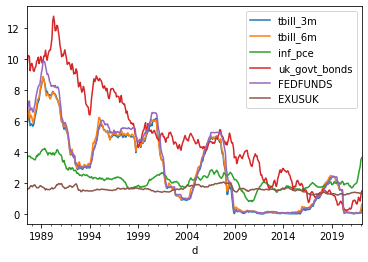

In [488]:
df1[["tbill_3m", "tbill_6m","inf_pce", "uk_govt_bonds", "FEDFUNDS", "EXUSUK"]].plot()

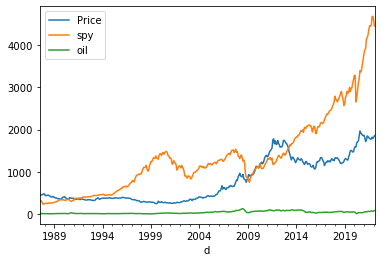

In [491]:
df1[["Price", "spy", "oil"]].plot()

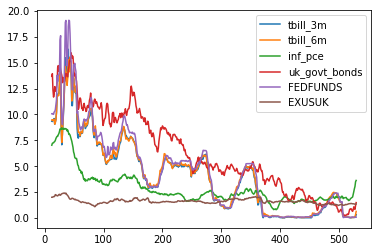

In [492]:
df2[["tbill_3m", "tbill_6m","inf_pce", "uk_govt_bonds", "FEDFUNDS", "EXUSUK"]].plot()

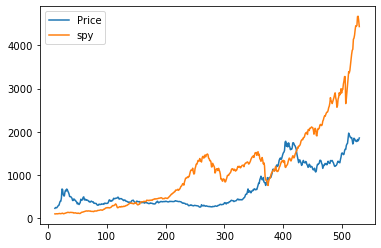

In [493]:
df2[["Price", "spy"]].plot()

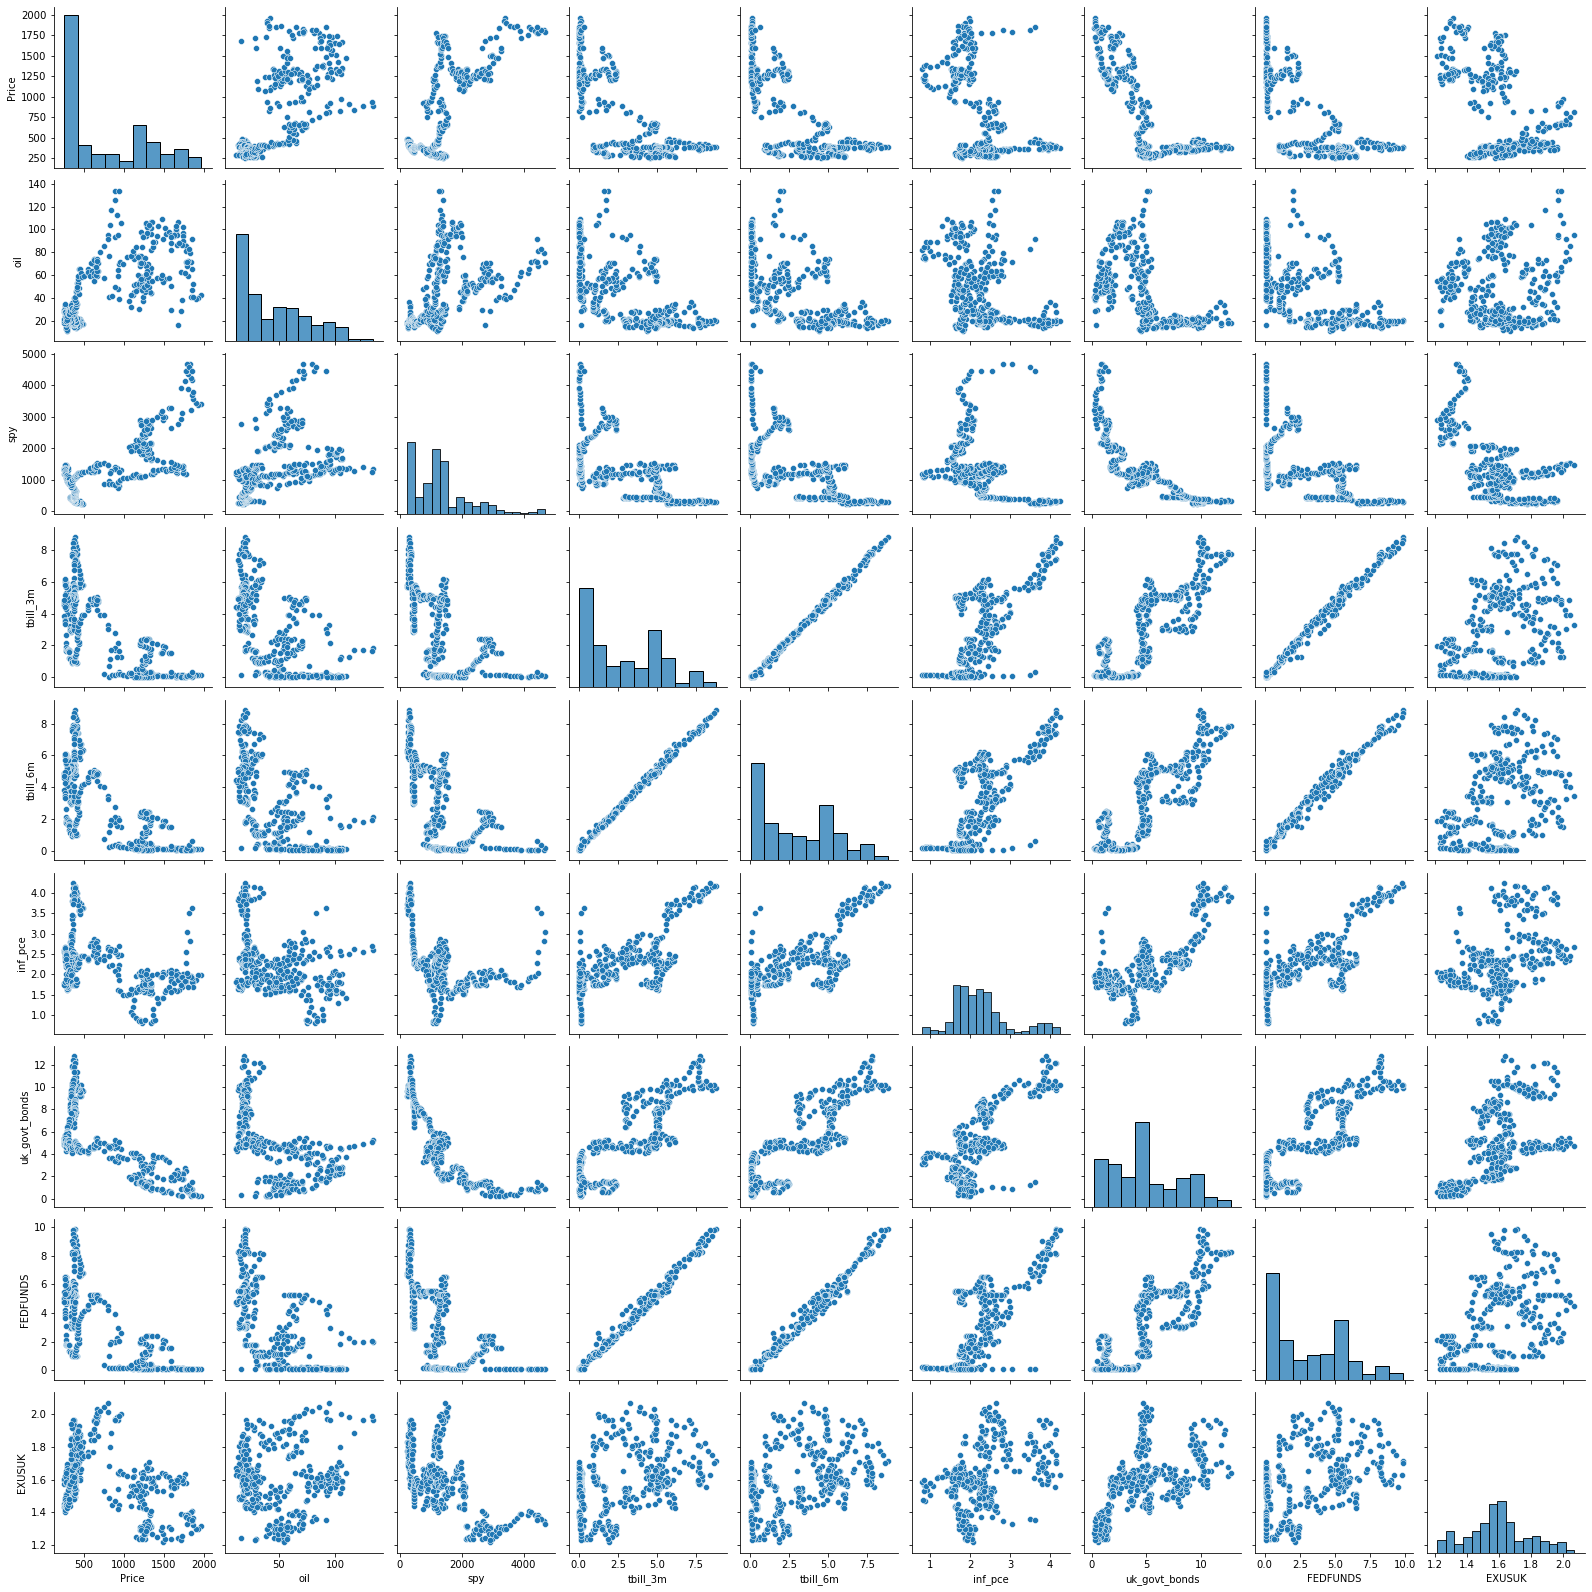

In [689]:
sns.pairplot(df1[["Price","oil","spy","tbill_3m", "tbill_6m","inf_pce", "uk_govt_bonds", "FEDFUNDS", "EXUSUK"]])

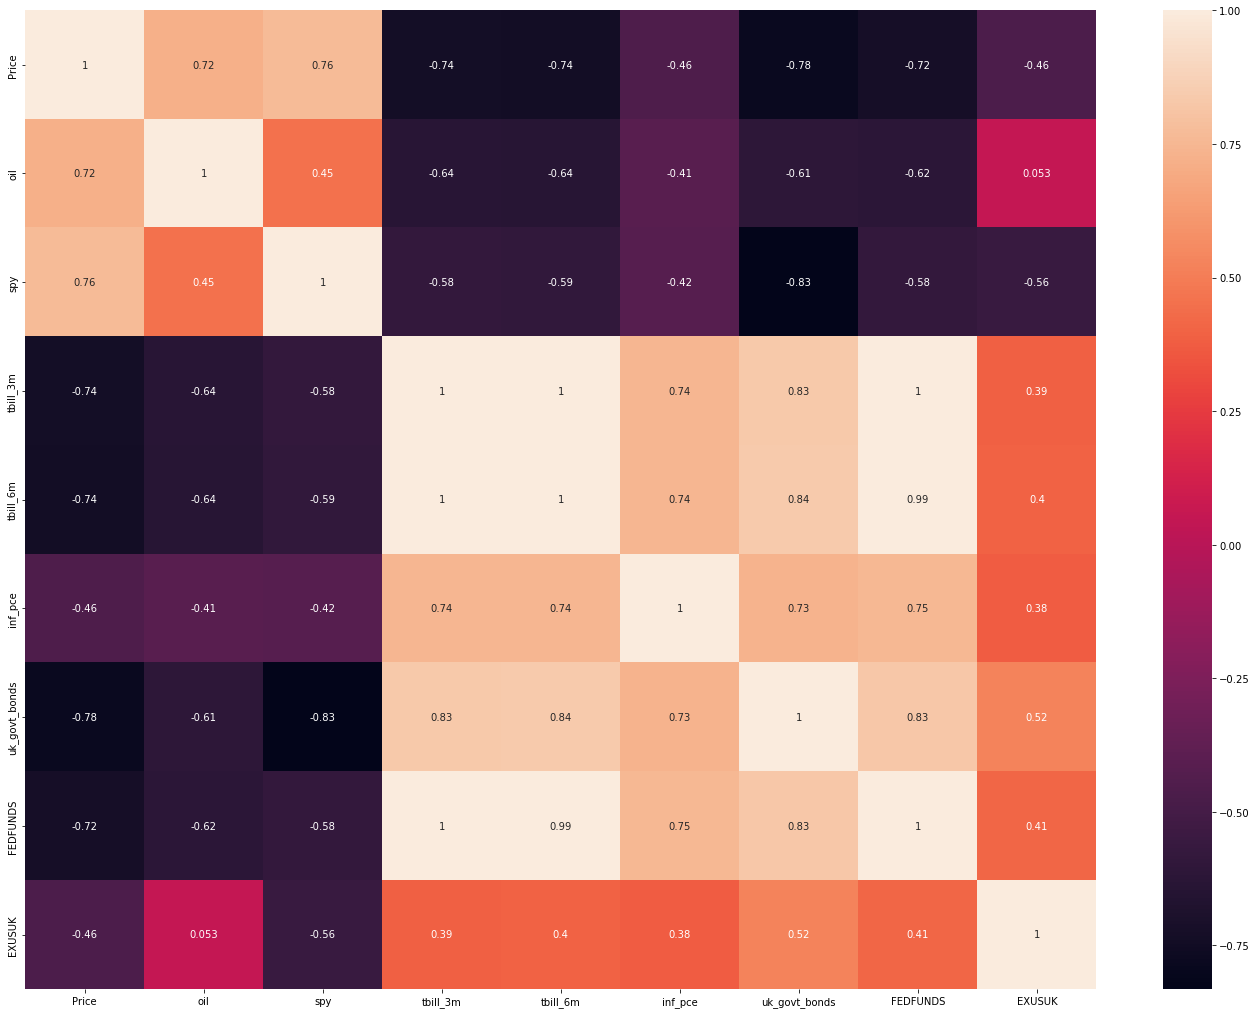

In [690]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df1[["Price","oil","spy","tbill_3m", "tbill_6m","inf_pce", "uk_govt_bonds", "FEDFUNDS", "EXUSUK"]].corr(), annot=True) 

## Based on the plots and correlation matrix above, I dropped the t-bill 3months and t-bill 6months since they do not provide much further information in realation to Fed Funds rates.

## I created two datasets, one with Oil and one with out Oil.
## Using both the datasets, I ran the following algorithms:
- **Multi-Layer Perceptron Neural Network**
- **Multi-Layer Perceptron regressor**
- **Long-Short Term model RNN**
- **Support Vector Regressor**

# Using dataset with all variables including Oil (df1)

In [317]:
mask = (df1["d"] > "2019-08-01")

### Creating train data as the data tavailable till August 2019 and I assumed the gold prices given are Start of the month prices.

In [504]:
train = df1.loc[~mask].drop(columns = ["index","Month","d", "tbill_3m", "tbill_6m"])
test = df1.loc[mask].drop(columns = ["index","Month","d", "tbill_3m", "tbill_6m"])

In [608]:
X_train = train.drop(columns = ["Price"])
y_train = train["Price"]

In [609]:
X_test = test.drop(columns = ["Price"])

### Defining the MLP Network with 2 dense layers one with 20 neurons and the other being the output dense layer. I used Relu activation for this network, with Adam stochastic gradient descent as optimizer and MSE as the loss function.

In [619]:
def mlp_network():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape = (18,)))
    model.add(Dense(1, activation='relu'))

    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
mlp_network = mlp_network()

### I used validation split as 0.30 and Early stopping with a patience of 30, so that if the validation score does not improve for more than 30 consecutive epochs, the network is stopped. And I set the Epochs to 1000.

In [591]:
callbacks = EarlyStopping(patience= 30)

In [592]:
mlp_network.fit(X_train, y_train, validation_split= 0.30, epochs= 1000, callbacks= callbacks)

Epoch 1/1000
9/9 [==============================] - 0s 14ms/step - loss: 475.6613 - val_loss: 3311.4199
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 445.1160 - val_loss: 2832.5706
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 365.2749 - val_loss: 4901.5044
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 331.7434 - val_loss: 3803.2886
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 342.9194 - val_loss: 4024.4304
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 348.3892 - val_loss: 2939.8887
Epoch 7/1000
9/9 [==============================] - 0s 6ms/step - loss: 307.8427 - val_loss: 4731.5972
Epoch 8/1000
9/9 [==============================] - 0s 6ms/step - loss: 337.6578 - val_loss: 5441.1978
Epoch 9/1000
9/9 [==============================] - 0s 8ms/step - loss: 335.6193 - val_loss: 3293.2393
Epoch 10/1000
9/9 [==============================] - 0s 9ms/step - loss:

In [593]:
nn_pred = mlp_network.predict(test.drop(columns = ["Price"]))

In [678]:
test["mlpn_pred"] = nn_pred

In [594]:
metrics.mean_squared_error(test["Price"], nn_pred)

3292.267125729485

### Prediction using MLP Regressor with 12 hidden layers and relu activation

In [521]:
model = mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=12,
                           max_iter=100, random_state=5,
                           activation="relu") 

In [626]:
model.fit(X_train, y_train)

C:\Users\samas\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=12, max_iter=100, random_state=5,
             solver='lbfgs')

In [627]:
predicted_price = model.predict(test.drop(columns = ["Price"]))

In [677]:
test["mlpr_pred"] = predicted_price

In [628]:
metrics.mean_squared_error(test["Price"], predicted_price)

2774.210755813486

### Prediction Using LSTM

### Reshaping the data to include the time step to feed into LSTM algorithm

In [526]:
X_train_lstm = X_train.values.reshape(X_train.values.shape[0], 18, 1)
X_test_lstm = X_test.values.reshape(X_test.values.shape[0], 18, 1)
X_train_lstm.shape

(386, 18, 1)

### Defining the LSTM algorithm with 100 neurons in LSTM layer and a dense output layer. The optimizer and the loss function used for this model are same as the those in MLP network but the activation used here is gelu.

In [595]:
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(18,1), activation='gelu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100)               40800     
                                                                 
 dense_69 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### I used validation split as 0.25.  And I set the Epochs to 1000.

In [656]:
lstm_model.fit(X_train_lstm, y_train, epochs= 1000, validation_split=0.25)

Epoch 1/1000
10/10 [==============================] - 0s 29ms/step - loss: 1393.8336 - val_loss: 17617.7480
Epoch 2/1000
10/10 [==============================] - 0s 21ms/step - loss: 1453.5653 - val_loss: 21145.7207
Epoch 3/1000
10/10 [==============================] - 0s 23ms/step - loss: 1257.5990 - val_loss: 21681.3223
Epoch 4/1000
10/10 [==============================] - 0s 24ms/step - loss: 1197.5691 - val_loss: 17780.8008
Epoch 5/1000
10/10 [==============================] - 0s 27ms/step - loss: 1178.1719 - val_loss: 19472.6953
Epoch 6/1000
10/10 [==============================] - 0s 30ms/step - loss: 1140.8916 - val_loss: 21120.6074
Epoch 7/1000
10/10 [==============================] - 0s 22ms/step - loss: 1068.9250 - val_loss: 18989.5938
Epoch 8/1000
10/10 [==============================] - 0s 23ms/step - loss: 1089.2922 - val_loss: 18918.0938
Epoch 9/1000
10/10 [==============================] - 0s 23ms/step - loss: 1099.9607 - val_loss: 18599.0781
Epoch 10/1000
10/10 [=======

Epoch 151/1000
10/10 [==============================] - 0s 24ms/step - loss: 925.7067 - val_loss: 23037.1602
Epoch 152/1000
10/10 [==============================] - 0s 31ms/step - loss: 1153.3502 - val_loss: 17824.3887
Epoch 153/1000
10/10 [==============================] - 0s 24ms/step - loss: 1018.2504 - val_loss: 17041.8906
Epoch 154/1000
10/10 [==============================] - 0s 22ms/step - loss: 999.9706 - val_loss: 15478.7549
Epoch 155/1000
10/10 [==============================] - 0s 24ms/step - loss: 1142.9017 - val_loss: 14677.6787
Epoch 156/1000
10/10 [==============================] - 0s 22ms/step - loss: 1419.0314 - val_loss: 15760.7490
Epoch 157/1000
10/10 [==============================] - 0s 28ms/step - loss: 1441.7368 - val_loss: 15068.6484
Epoch 158/1000
10/10 [==============================] - 0s 26ms/step - loss: 1077.8802 - val_loss: 14454.7266
Epoch 159/1000
10/10 [==============================] - 0s 26ms/step - loss: 1169.8993 - val_loss: 14642.3955
Epoch 160/10

10/10 [==============================] - 0s 24ms/step - loss: 1294.6992 - val_loss: 14140.1582
Epoch 300/1000
10/10 [==============================] - 0s 23ms/step - loss: 1344.3824 - val_loss: 12752.2227
Epoch 301/1000
10/10 [==============================] - 0s 27ms/step - loss: 1394.7998 - val_loss: 11999.9189
Epoch 302/1000
10/10 [==============================] - 0s 22ms/step - loss: 1477.4338 - val_loss: 17859.6914
Epoch 303/1000
10/10 [==============================] - 0s 24ms/step - loss: 1119.2200 - val_loss: 19367.9648
Epoch 304/1000
10/10 [==============================] - 0s 23ms/step - loss: 1145.3539 - val_loss: 16822.4141
Epoch 305/1000
10/10 [==============================] - 0s 23ms/step - loss: 1159.1895 - val_loss: 14751.0762
Epoch 306/1000
10/10 [==============================] - 0s 23ms/step - loss: 1342.2625 - val_loss: 17958.7891
Epoch 307/1000
10/10 [==============================] - 0s 23ms/step - loss: 1167.1045 - val_loss: 12184.5762
Epoch 308/1000
10/10 [===

Epoch 448/1000
10/10 [==============================] - 0s 22ms/step - loss: 1100.8422 - val_loss: 20160.3594
Epoch 449/1000
10/10 [==============================] - 0s 20ms/step - loss: 998.5330 - val_loss: 19316.8828
Epoch 450/1000
10/10 [==============================] - 0s 21ms/step - loss: 1061.2703 - val_loss: 22304.1348
Epoch 451/1000
10/10 [==============================] - 0s 21ms/step - loss: 1233.4655 - val_loss: 19829.4336
Epoch 452/1000
10/10 [==============================] - 0s 27ms/step - loss: 1000.3145 - val_loss: 19868.2617
Epoch 453/1000
10/10 [==============================] - 0s 21ms/step - loss: 964.0911 - val_loss: 19428.1504
Epoch 454/1000
10/10 [==============================] - 0s 22ms/step - loss: 935.2981 - val_loss: 19043.0508
Epoch 455/1000
10/10 [==============================] - 0s 21ms/step - loss: 923.5571 - val_loss: 19552.3340
Epoch 456/1000
10/10 [==============================] - 0s 21ms/step - loss: 865.0709 - val_loss: 20162.1914
Epoch 457/1000


Epoch 523/1000
10/10 [==============================] - 0s 23ms/step - loss: 898.1879 - val_loss: 19665.7988
Epoch 524/1000
10/10 [==============================] - 0s 22ms/step - loss: 1346.3989 - val_loss: 20651.2480
Epoch 525/1000
10/10 [==============================] - 0s 21ms/step - loss: 1244.2443 - val_loss: 19752.4824
Epoch 526/1000
10/10 [==============================] - 0s 22ms/step - loss: 970.4185 - val_loss: 18767.2363
Epoch 527/1000
10/10 [==============================] - 0s 22ms/step - loss: 958.7512 - val_loss: 19512.9102
Epoch 528/1000
10/10 [==============================] - 0s 21ms/step - loss: 1070.6820 - val_loss: 20304.6953
Epoch 529/1000
10/10 [==============================] - 0s 21ms/step - loss: 2131.8381 - val_loss: 31183.8477
Epoch 530/1000
10/10 [==============================] - 0s 22ms/step - loss: 1769.7117 - val_loss: 22226.1230
Epoch 531/1000
10/10 [==============================] - 0s 22ms/step - loss: 1208.3733 - val_loss: 19066.7207
Epoch 532/100

10/10 [==============================] - 0s 21ms/step - loss: 1042.6665 - val_loss: 17248.9414
Epoch 672/1000
10/10 [==============================] - 0s 22ms/step - loss: 1036.9969 - val_loss: 17626.5664
Epoch 673/1000
10/10 [==============================] - 0s 23ms/step - loss: 1076.8335 - val_loss: 16544.8066
Epoch 674/1000
10/10 [==============================] - 0s 21ms/step - loss: 1063.9878 - val_loss: 17608.6387
Epoch 675/1000
10/10 [==============================] - 0s 20ms/step - loss: 1090.2454 - val_loss: 18403.6016
Epoch 676/1000
10/10 [==============================] - 0s 22ms/step - loss: 1188.7061 - val_loss: 18196.3965
Epoch 677/1000
10/10 [==============================] - 0s 22ms/step - loss: 1258.7382 - val_loss: 17924.4414
Epoch 678/1000
10/10 [==============================] - 0s 23ms/step - loss: 1101.8954 - val_loss: 16992.2441
Epoch 679/1000
10/10 [==============================] - 0s 20ms/step - loss: 1025.1449 - val_loss: 17498.1895
Epoch 680/1000
10/10 [===

10/10 [==============================] - 0s 23ms/step - loss: 908.1750 - val_loss: 19435.2871
Epoch 747/1000
10/10 [==============================] - 0s 20ms/step - loss: 884.1459 - val_loss: 17405.4004
Epoch 748/1000
10/10 [==============================] - 0s 21ms/step - loss: 827.6442 - val_loss: 18068.8496
Epoch 749/1000
10/10 [==============================] - 0s 22ms/step - loss: 876.7524 - val_loss: 19470.4141
Epoch 750/1000
10/10 [==============================] - 0s 20ms/step - loss: 913.2203 - val_loss: 19375.1543
Epoch 751/1000
10/10 [==============================] - 0s 21ms/step - loss: 1046.4753 - val_loss: 16905.1992
Epoch 752/1000
10/10 [==============================] - 0s 21ms/step - loss: 1093.1302 - val_loss: 14334.7227
Epoch 753/1000
10/10 [==============================] - 0s 21ms/step - loss: 2434.6143 - val_loss: 15577.4434
Epoch 754/1000
10/10 [==============================] - 0s 20ms/step - loss: 1336.4238 - val_loss: 56773.5781
Epoch 755/1000
10/10 [========

10/10 [==============================] - 0s 27ms/step - loss: 4761.4531 - val_loss: 16127.0732
Epoch 822/1000
10/10 [==============================] - 0s 24ms/step - loss: 1660.0884 - val_loss: 14576.0557
Epoch 823/1000
10/10 [==============================] - 0s 22ms/step - loss: 1171.3759 - val_loss: 18695.6445
Epoch 824/1000
10/10 [==============================] - 0s 22ms/step - loss: 1050.2382 - val_loss: 18689.3691
Epoch 825/1000
10/10 [==============================] - 0s 21ms/step - loss: 911.3487 - val_loss: 17018.4590
Epoch 826/1000
10/10 [==============================] - 0s 23ms/step - loss: 917.8737 - val_loss: 18274.0938
Epoch 827/1000
10/10 [==============================] - 0s 23ms/step - loss: 950.2858 - val_loss: 17109.1719
Epoch 828/1000
10/10 [==============================] - 0s 20ms/step - loss: 925.7173 - val_loss: 17959.5801
Epoch 829/1000
10/10 [==============================] - 0s 26ms/step - loss: 918.4358 - val_loss: 18487.7324
Epoch 830/1000
10/10 [========

10/10 [==============================] - 0s 21ms/step - loss: 798.4824 - val_loss: 18240.2383
Epoch 897/1000
10/10 [==============================] - 0s 20ms/step - loss: 731.2919 - val_loss: 16301.5596
Epoch 898/1000
10/10 [==============================] - 0s 23ms/step - loss: 789.5477 - val_loss: 18223.9453
Epoch 899/1000
10/10 [==============================] - 0s 22ms/step - loss: 857.2413 - val_loss: 15705.6396
Epoch 900/1000
10/10 [==============================] - 0s 20ms/step - loss: 819.2526 - val_loss: 14453.9434
Epoch 901/1000
10/10 [==============================] - 0s 22ms/step - loss: 753.1565 - val_loss: 19204.7285
Epoch 902/1000
10/10 [==============================] - 0s 22ms/step - loss: 884.1393 - val_loss: 16088.5850
Epoch 903/1000
10/10 [==============================] - 0s 23ms/step - loss: 789.8992 - val_loss: 15660.1680
Epoch 904/1000
10/10 [==============================] - 0s 21ms/step - loss: 789.2974 - val_loss: 18893.1797
Epoch 905/1000
10/10 [============

10/10 [==============================] - 0s 22ms/step - loss: 923.9053 - val_loss: 19365.4531
Epoch 972/1000
10/10 [==============================] - 0s 20ms/step - loss: 1063.5173 - val_loss: 21607.4043
Epoch 973/1000
10/10 [==============================] - 0s 20ms/step - loss: 982.1663 - val_loss: 14208.7383
Epoch 974/1000
10/10 [==============================] - 0s 22ms/step - loss: 1120.8873 - val_loss: 17567.2676
Epoch 975/1000
10/10 [==============================] - 0s 21ms/step - loss: 955.2053 - val_loss: 25996.3008
Epoch 976/1000
10/10 [==============================] - 0s 21ms/step - loss: 1823.5059 - val_loss: 13865.6133
Epoch 977/1000
10/10 [==============================] - 0s 21ms/step - loss: 1166.1993 - val_loss: 13772.6357
Epoch 978/1000
10/10 [==============================] - 0s 20ms/step - loss: 3878.4365 - val_loss: 15407.0859
Epoch 979/1000
10/10 [==============================] - 0s 22ms/step - loss: 2433.7769 - val_loss: 16995.0352
Epoch 980/1000
10/10 [======

In [663]:
lstm_pred = lstm_model.predict(X_test_lstm)

In [676]:
test["lstm_pred"] = lstm_pred

In [664]:
metrics.mean_squared_error(test["Price"], lstm_pred)

15159.682648024147

### Prediction using Support Vector Regressor

In [551]:
from sklearn.svm import SVR

In [552]:
svr_lin = SVR(kernel='linear')
linear_svr = svr_lin.fit(X_train,y_train)


In [553]:
svr_pred = linear_svr.predict(X_test)

In [675]:
test["svr_pred"] = svr_pred

In [554]:
metrics.mean_squared_error(test["Price"], svr_pred)

2894.358006353271

In [679]:
test[["Price", "mlpn_pred", "mlpr_pred", "lstm_pred", "svr_pred"]]

,Price,mlpn_pred,mlpr_pred,lstm_pred,svr_pred
d,,,,,
2019-09-01,1510.58,1504.082642,1496.479629,1369.663452,1498.785447
2019-10-01,1494.81,1534.898193,1506.172662,1396.629150,1478.268005
2019-11-01,1470.79,1525.516479,1495.370881,1425.861328,1494.255335
2019-12-01,1479.13,1488.655640,1492.543050,1446.347290,1463.956909
2020-01-01,1560.67,1475.728271,1480.172284,1464.981934,1501.506300
2020-02-01,1597.10,1532.652832,1570.022678,1488.695801,1553.227702
2020-03-01,1591.93,1571.927979,1574.273628,1482.052490,1586.986535
2020-04-01,1683.17,1583.382324,1584.116409,1508.400635,1553.345615
2020-05-01,1715.91,1690.504639,1669.161018,1549.471924,1688.058360


## Plotting the predictions of the test data from 2019-09 - 2022-02 using all the above models.

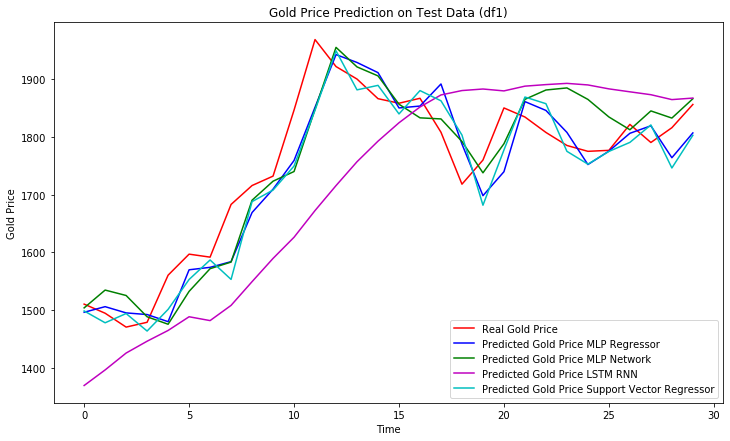

In [668]:
plt.figure(figsize=(12,7))

plt.plot(test['Price'].values, color = 'red', label = 'Real Gold Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Gold Price MLP Regressor')
plt.plot(nn_pred, color = 'green', label = 'Predicted Gold Price MLP Network')
plt.plot(lstm_pred,color = 'm', label = 'Predicted Gold Price LSTM RNN')
plt.plot(svr_pred,color = 'c', label = 'Predicted Gold Price Support Vector Regressor')
plt.title('Gold Price Prediction on Test Data (df1)')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

### Based on the Plot and Performance metrics, the SVR and MLP regressor outperform the LSTM and the MLP network when it comes to forecasting the gold price. LSTM performed the worst when it came to predicting both test and validation sets. Although, the predictions from all algortihms look like one period lagged prices of Gold. This would mean that this month's price is the best estimate of the next month!

# Using dataset df2 (Excluding Oil)

In [611]:
mask1 = (df2["d"] > "2019-08-01")

In [613]:
train1 = df2.loc[~mask1].drop(columns = ["index","Month","d", "tbill_3m", "tbill_6m"])
test1 = df2.loc[mask1].drop(columns = ["index","Month","d", "tbill_3m", "tbill_6m"])

In [614]:
X_train1 = train1.drop(columns = ["Price"])
y_train1 = train1["Price"]

In [615]:
X_test1 = test1.drop(columns = ["Price"])

### Predicting using MLP network

In [618]:
def mlp_network1():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape = (17,)))
    model.add(Dense(1, activation='relu'))

    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
mlp_network1 = mlp_network1()

In [620]:
mlp_network1.fit(X_train1, y_train1, validation_split= 0.30, epochs= 1000, callbacks= callbacks)

Epoch 1/1000
11/11 [==============================] - 1s 18ms/step - loss: 85918.1719 - val_loss: 273889.8125
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 26877.4727 - val_loss: 94125.7109
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 20967.1895 - val_loss: 100844.0156
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 13793.3340 - val_loss: 62612.5938
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 10414.3770 - val_loss: 45752.0391
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 8462.1914 - val_loss: 43176.8320
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 7196.2993 - val_loss: 38339.7578
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 6492.0142 - val_loss: 35522.1406
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 5920.6167 - val_loss: 37427.4805
Epoch 10/1000
11/11 [========

Epoch 154/1000
11/11 [==============================] - 0s 6ms/step - loss: 543.2560 - val_loss: 3484.4285
Epoch 155/1000
11/11 [==============================] - 0s 5ms/step - loss: 550.0425 - val_loss: 3149.1331
Epoch 156/1000
11/11 [==============================] - 0s 5ms/step - loss: 555.9997 - val_loss: 3551.3081
Epoch 157/1000
11/11 [==============================] - 0s 5ms/step - loss: 533.7747 - val_loss: 3145.6785
Epoch 158/1000
11/11 [==============================] - 0s 4ms/step - loss: 532.2058 - val_loss: 2936.1323
Epoch 159/1000
11/11 [==============================] - 0s 5ms/step - loss: 537.6603 - val_loss: 2777.0303
Epoch 160/1000
11/11 [==============================] - 0s 5ms/step - loss: 544.1882 - val_loss: 2915.3213
Epoch 161/1000
11/11 [==============================] - 0s 5ms/step - loss: 530.0648 - val_loss: 2897.5845
Epoch 162/1000
11/11 [==============================] - 0s 4ms/step - loss: 530.0073 - val_loss: 3716.1360
Epoch 163/1000
11/11 [===============

In [621]:
nn_pred1 = mlp_network1.predict(test1.drop(columns = ["Price"]))

In [674]:
test1["mlpn_pred1"] = nn_pred1

In [622]:
metrics.mean_squared_error(test1["Price"], nn_pred1)

4402.925010840082

### Predicting Using MLP Regressor with 12 hidden layers and relu activation

In [624]:
model1 = mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=12,
                           max_iter=100, random_state=5,
                           activation="relu") 

In [625]:
model1.fit(X_train1, y_train1)

C:\Users\samas\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=12, max_iter=100, random_state=5,
             solver='lbfgs')

In [629]:
predicted_price1 = model1.predict(test1.drop(columns = ["Price"]))

In [673]:
test1['mlpr_pred1'] = predicted_price1

In [630]:
metrics.mean_squared_error(test1["Price"], predicted_price1)

2483.471392340058

### Prediction Using LSTM

In [631]:
X_train_lstm1 = X_train1.values.reshape(X_train1.values.shape[0], 17, 1)
X_test_lstm1 = X_test1.values.reshape(X_test1.values.shape[0], 17, 1)
X_train_lstm1.shape

(488, 17, 1)

In [632]:
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

lstm_model1 = Sequential()
lstm_model1.add(LSTM(100, input_shape=(17,1), activation='gelu'))
lstm_model1.add(Dense(1))
lstm_model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model1.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100)               40800     
                                                                 
 dense_78 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [659]:
lstm_model1.fit(X_train_lstm1, y_train1, epochs= 1000, validation_split=0.25)

Epoch 1/1000
12/12 [==============================] - 0s 25ms/step - loss: 914.2172 - val_loss: 4408.5591
Epoch 2/1000
12/12 [==============================] - 0s 20ms/step - loss: 712.5080 - val_loss: 4266.0586
Epoch 3/1000
12/12 [==============================] - 0s 21ms/step - loss: 673.7610 - val_loss: 4616.1211
Epoch 4/1000
12/12 [==============================] - 0s 21ms/step - loss: 786.5872 - val_loss: 8472.2939
Epoch 5/1000
12/12 [==============================] - 0s 22ms/step - loss: 780.3911 - val_loss: 4971.9131
Epoch 6/1000
12/12 [==============================] - 0s 22ms/step - loss: 860.0224 - val_loss: 4667.3394
Epoch 7/1000
12/12 [==============================] - 0s 21ms/step - loss: 923.0486 - val_loss: 4509.6318
Epoch 8/1000
12/12 [==============================] - 0s 20ms/step - loss: 1030.6794 - val_loss: 17205.9941
Epoch 9/1000
12/12 [==============================] - 0s 21ms/step - loss: 1029.5114 - val_loss: 7773.2681
Epoch 10/1000
12/12 [======================

12/12 [==============================] - 0s 21ms/step - loss: 527.1329 - val_loss: 3782.1807
Epoch 154/1000
12/12 [==============================] - 0s 23ms/step - loss: 482.2671 - val_loss: 4493.2622
Epoch 155/1000
12/12 [==============================] - 0s 19ms/step - loss: 521.3258 - val_loss: 6126.6724
Epoch 156/1000
12/12 [==============================] - 0s 18ms/step - loss: 533.8589 - val_loss: 4516.3613
Epoch 157/1000
12/12 [==============================] - 0s 20ms/step - loss: 586.7130 - val_loss: 7408.8032
Epoch 158/1000
12/12 [==============================] - 0s 20ms/step - loss: 638.3309 - val_loss: 4068.9165
Epoch 159/1000
12/12 [==============================] - 0s 22ms/step - loss: 499.5335 - val_loss: 5662.8267
Epoch 160/1000
12/12 [==============================] - 0s 18ms/step - loss: 523.4982 - val_loss: 4918.0449
Epoch 161/1000
12/12 [==============================] - 0s 18ms/step - loss: 548.9324 - val_loss: 6619.7305
Epoch 162/1000
12/12 [=====================

Epoch 229/1000
12/12 [==============================] - 0s 21ms/step - loss: 486.4473 - val_loss: 4525.3999
Epoch 230/1000
12/12 [==============================] - 0s 21ms/step - loss: 464.5429 - val_loss: 4230.6714
Epoch 231/1000
12/12 [==============================] - 0s 25ms/step - loss: 779.0323 - val_loss: 11348.6934
Epoch 232/1000
12/12 [==============================] - 0s 23ms/step - loss: 938.4755 - val_loss: 7392.8882
Epoch 233/1000
12/12 [==============================] - 0s 23ms/step - loss: 897.0937 - val_loss: 6134.5132
Epoch 234/1000
12/12 [==============================] - 0s 25ms/step - loss: 906.1734 - val_loss: 15380.1426
Epoch 235/1000
12/12 [==============================] - 0s 27ms/step - loss: 969.2957 - val_loss: 10467.5752
Epoch 236/1000
12/12 [==============================] - 0s 22ms/step - loss: 976.6993 - val_loss: 8768.4648
Epoch 237/1000
12/12 [==============================] - 0s 22ms/step - loss: 838.1383 - val_loss: 7612.3149
Epoch 238/1000
12/12 [===

Epoch 305/1000
12/12 [==============================] - 0s 29ms/step - loss: 594.4449 - val_loss: 3044.9846
Epoch 306/1000
12/12 [==============================] - 0s 27ms/step - loss: 750.1592 - val_loss: 9769.4990
Epoch 307/1000
12/12 [==============================] - 0s 24ms/step - loss: 849.0452 - val_loss: 7894.8789
Epoch 308/1000
12/12 [==============================] - 0s 25ms/step - loss: 793.1460 - val_loss: 3464.9917
Epoch 309/1000
12/12 [==============================] - 0s 27ms/step - loss: 774.7313 - val_loss: 6776.3423
Epoch 310/1000
12/12 [==============================] - 0s 25ms/step - loss: 571.2773 - val_loss: 3345.9553
Epoch 311/1000
12/12 [==============================] - 0s 26ms/step - loss: 565.5076 - val_loss: 2823.3757
Epoch 312/1000
12/12 [==============================] - 0s 30ms/step - loss: 526.5155 - val_loss: 3159.4822
Epoch 313/1000
12/12 [==============================] - 0s 30ms/step - loss: 541.1805 - val_loss: 4166.3774
Epoch 314/1000
12/12 [======

Epoch 381/1000
12/12 [==============================] - 0s 39ms/step - loss: 504.1940 - val_loss: 3353.9033
Epoch 382/1000
12/12 [==============================] - 0s 36ms/step - loss: 482.0764 - val_loss: 5240.0464
Epoch 383/1000
12/12 [==============================] - 0s 38ms/step - loss: 438.3057 - val_loss: 4507.2915
Epoch 384/1000
12/12 [==============================] - 0s 36ms/step - loss: 450.6402 - val_loss: 3012.5642
Epoch 385/1000
12/12 [==============================] - 0s 38ms/step - loss: 459.7627 - val_loss: 3758.8096
Epoch 386/1000
12/12 [==============================] - 0s 40ms/step - loss: 539.4088 - val_loss: 3371.1602
Epoch 387/1000
12/12 [==============================] - 0s 39ms/step - loss: 468.7909 - val_loss: 3094.8726
Epoch 388/1000
12/12 [==============================] - 1s 45ms/step - loss: 419.8942 - val_loss: 2655.7712
Epoch 389/1000
12/12 [==============================] - 1s 43ms/step - loss: 424.8552 - val_loss: 5053.7690
Epoch 390/1000
12/12 [======

Epoch 457/1000
12/12 [==============================] - 1s 44ms/step - loss: 567.4419 - val_loss: 3951.2803
Epoch 458/1000
12/12 [==============================] - 1s 42ms/step - loss: 452.9455 - val_loss: 5684.2480
Epoch 459/1000
12/12 [==============================] - 1s 43ms/step - loss: 509.1198 - val_loss: 6964.0620
Epoch 460/1000
12/12 [==============================] - 1s 44ms/step - loss: 567.5052 - val_loss: 8150.0938
Epoch 461/1000
12/12 [==============================] - 0s 40ms/step - loss: 525.2332 - val_loss: 4239.2905
Epoch 462/1000
12/12 [==============================] - 0s 40ms/step - loss: 612.9808 - val_loss: 4768.6875
Epoch 463/1000
12/12 [==============================] - 0s 40ms/step - loss: 684.1890 - val_loss: 3257.4963
Epoch 464/1000
12/12 [==============================] - 1s 43ms/step - loss: 734.1800 - val_loss: 4206.3262
Epoch 465/1000
12/12 [==============================] - 0s 41ms/step - loss: 810.5434 - val_loss: 3434.6011
Epoch 466/1000
12/12 [======

Epoch 533/1000
12/12 [==============================] - 0s 38ms/step - loss: 455.4905 - val_loss: 2949.0803
Epoch 534/1000
12/12 [==============================] - 0s 37ms/step - loss: 460.0146 - val_loss: 3322.0271
Epoch 535/1000
12/12 [==============================] - 0s 38ms/step - loss: 438.1924 - val_loss: 2832.2686
Epoch 536/1000
12/12 [==============================] - 0s 38ms/step - loss: 474.3269 - val_loss: 3280.8799
Epoch 537/1000
12/12 [==============================] - 0s 38ms/step - loss: 452.5966 - val_loss: 3014.7192
Epoch 538/1000
12/12 [==============================] - 0s 38ms/step - loss: 442.7600 - val_loss: 2697.1340
Epoch 539/1000
12/12 [==============================] - 0s 38ms/step - loss: 515.8656 - val_loss: 3121.4197
Epoch 540/1000
12/12 [==============================] - 0s 40ms/step - loss: 488.5247 - val_loss: 3556.5466
Epoch 541/1000
12/12 [==============================] - 0s 39ms/step - loss: 435.6949 - val_loss: 2794.6531
Epoch 542/1000
12/12 [======

Epoch 609/1000
12/12 [==============================] - 0s 35ms/step - loss: 517.2654 - val_loss: 3347.0828
Epoch 610/1000
12/12 [==============================] - 0s 35ms/step - loss: 466.0500 - val_loss: 3544.6880
Epoch 611/1000
12/12 [==============================] - 0s 33ms/step - loss: 473.9836 - val_loss: 5333.5435
Epoch 612/1000
12/12 [==============================] - 0s 33ms/step - loss: 517.7403 - val_loss: 4153.0864
Epoch 613/1000
12/12 [==============================] - 0s 35ms/step - loss: 608.7882 - val_loss: 2803.5977
Epoch 614/1000
12/12 [==============================] - 0s 31ms/step - loss: 598.3306 - val_loss: 7127.6147
Epoch 615/1000
12/12 [==============================] - 0s 32ms/step - loss: 549.0469 - val_loss: 3837.4744
Epoch 616/1000
12/12 [==============================] - 0s 32ms/step - loss: 732.1254 - val_loss: 10539.1963
Epoch 617/1000
12/12 [==============================] - 0s 29ms/step - loss: 762.9103 - val_loss: 2668.1968
Epoch 618/1000
12/12 [=====

Epoch 685/1000
12/12 [==============================] - 0s 30ms/step - loss: 411.4250 - val_loss: 3478.1118
Epoch 686/1000
12/12 [==============================] - 0s 27ms/step - loss: 430.3432 - val_loss: 4302.6191
Epoch 687/1000
12/12 [==============================] - 0s 28ms/step - loss: 410.2450 - val_loss: 3880.7207
Epoch 688/1000
12/12 [==============================] - 0s 28ms/step - loss: 420.2242 - val_loss: 4035.1414
Epoch 689/1000
12/12 [==============================] - 0s 27ms/step - loss: 450.8531 - val_loss: 6229.8086
Epoch 690/1000
12/12 [==============================] - 0s 29ms/step - loss: 521.6338 - val_loss: 3934.3735
Epoch 691/1000
12/12 [==============================] - 0s 27ms/step - loss: 538.2900 - val_loss: 5426.8218
Epoch 692/1000
12/12 [==============================] - 0s 28ms/step - loss: 530.1774 - val_loss: 3482.7742
Epoch 693/1000
12/12 [==============================] - 0s 27ms/step - loss: 552.2431 - val_loss: 3373.8420
Epoch 694/1000
12/12 [======

Epoch 761/1000
12/12 [==============================] - 0s 25ms/step - loss: 592.6177 - val_loss: 4719.3633
Epoch 762/1000
12/12 [==============================] - 0s 25ms/step - loss: 535.6485 - val_loss: 3548.3530
Epoch 763/1000
12/12 [==============================] - 0s 24ms/step - loss: 705.5600 - val_loss: 3634.8438
Epoch 764/1000
12/12 [==============================] - 0s 25ms/step - loss: 572.9509 - val_loss: 2931.9324
Epoch 765/1000
12/12 [==============================] - 0s 25ms/step - loss: 644.9011 - val_loss: 3599.5852
Epoch 766/1000
12/12 [==============================] - 0s 25ms/step - loss: 611.0962 - val_loss: 4450.4580
Epoch 767/1000
12/12 [==============================] - 0s 23ms/step - loss: 754.5369 - val_loss: 3784.3413
Epoch 768/1000
12/12 [==============================] - 0s 24ms/step - loss: 1011.8069 - val_loss: 5675.0996
Epoch 769/1000
12/12 [==============================] - 0s 23ms/step - loss: 822.2147 - val_loss: 5592.0508
Epoch 770/1000
12/12 [=====

Epoch 837/1000
12/12 [==============================] - 0s 23ms/step - loss: 420.7752 - val_loss: 2394.8901
Epoch 838/1000
12/12 [==============================] - 0s 22ms/step - loss: 429.1535 - val_loss: 2833.8760
Epoch 839/1000
12/12 [==============================] - 0s 23ms/step - loss: 400.7248 - val_loss: 2902.1238
Epoch 840/1000
12/12 [==============================] - 0s 22ms/step - loss: 403.6208 - val_loss: 3687.8662
Epoch 841/1000
12/12 [==============================] - 0s 24ms/step - loss: 389.9446 - val_loss: 3120.3774
Epoch 842/1000
12/12 [==============================] - 0s 23ms/step - loss: 373.4613 - val_loss: 4007.1062
Epoch 843/1000
12/12 [==============================] - 0s 23ms/step - loss: 379.6470 - val_loss: 3987.9722
Epoch 844/1000
12/12 [==============================] - 0s 22ms/step - loss: 379.2242 - val_loss: 2441.6929
Epoch 845/1000
12/12 [==============================] - 0s 25ms/step - loss: 377.9986 - val_loss: 2831.9648
Epoch 846/1000
12/12 [======

Epoch 913/1000
12/12 [==============================] - 0s 20ms/step - loss: 366.0049 - val_loss: 3167.5295
Epoch 914/1000
12/12 [==============================] - 0s 23ms/step - loss: 404.9138 - val_loss: 5126.7734
Epoch 915/1000
12/12 [==============================] - 0s 22ms/step - loss: 356.6672 - val_loss: 2968.2605
Epoch 916/1000
12/12 [==============================] - 0s 25ms/step - loss: 362.7083 - val_loss: 2718.4019
Epoch 917/1000
12/12 [==============================] - 0s 22ms/step - loss: 367.8268 - val_loss: 3047.8669
Epoch 918/1000
12/12 [==============================] - 0s 22ms/step - loss: 416.5072 - val_loss: 3662.3909
Epoch 919/1000
12/12 [==============================] - 0s 20ms/step - loss: 388.0417 - val_loss: 3491.4031
Epoch 920/1000
12/12 [==============================] - 0s 22ms/step - loss: 441.5635 - val_loss: 4609.9209
Epoch 921/1000
12/12 [==============================] - 0s 22ms/step - loss: 418.7834 - val_loss: 2511.9426
Epoch 922/1000
12/12 [======

Epoch 989/1000
12/12 [==============================] - 0s 22ms/step - loss: 543.0172 - val_loss: 7581.2798
Epoch 990/1000
12/12 [==============================] - 0s 21ms/step - loss: 689.6873 - val_loss: 9095.0195
Epoch 991/1000
12/12 [==============================] - 0s 23ms/step - loss: 623.9459 - val_loss: 9141.2734
Epoch 992/1000
12/12 [==============================] - 0s 21ms/step - loss: 762.2950 - val_loss: 3397.2249
Epoch 993/1000
12/12 [==============================] - 0s 21ms/step - loss: 692.2838 - val_loss: 5967.3799
Epoch 994/1000
12/12 [==============================] - 0s 21ms/step - loss: 637.6830 - val_loss: 4081.1873
Epoch 995/1000
12/12 [==============================] - 0s 22ms/step - loss: 476.1895 - val_loss: 4300.7007
Epoch 996/1000
12/12 [==============================] - 0s 21ms/step - loss: 508.7907 - val_loss: 3393.1077
Epoch 997/1000
12/12 [==============================] - 0s 22ms/step - loss: 383.8796 - val_loss: 3589.4751
Epoch 998/1000
12/12 [======

In [660]:
lstm_pred1 = lstm_model1.predict(X_test_lstm1)

In [672]:
test1["lstm_pred1"] = lstm_pred1

In [661]:
metrics.mean_squared_error(test1["Price"], lstm_pred1)

11743.067182265579

### Prediction using Support Vector Regressor

In [641]:
svr_lin1 = SVR(kernel='linear')
linear_svr1 = svr_lin1.fit(X_train1,y_train1)


In [642]:
svr_pred1 = linear_svr1.predict(X_test1)

In [671]:
test1["svr_pred1"] = svr_pred1

In [683]:
test1['d'] = test.index

In [685]:
test1.set_index(test1["d"], inplace = True)

In [643]:
metrics.mean_squared_error(test1["Price"], svr_pred1)

2390.530164986854

In [686]:
test1[["Price", "mlpn_pred1", "mlpr_pred1", "lstm_pred1", "svr_pred1"]]

,Price,mlpn_pred1,mlpr_pred1,lstm_pred1,svr_pred1
d,,,,,
2019-09-01,1510.58,1452.686890,1512.835830,1546.959595,1507.240959
2019-10-01,1494.81,1475.086548,1515.722652,1577.605225,1491.619141
2019-11-01,1470.79,1488.350952,1510.027645,1572.552490,1502.796893
2019-12-01,1479.13,1474.093506,1493.918356,1541.756836,1476.202242
2020-01-01,1560.67,1484.737305,1505.789219,1554.954224,1509.733306
2020-02-01,1597.10,1539.643799,1586.853417,1614.811523,1574.885461
2020-03-01,1591.93,1557.268921,1594.176545,1688.055054,1599.795390
2020-04-01,1683.17,1557.975464,1587.040255,1704.709961,1577.654691
2020-05-01,1715.91,1641.512573,1717.882460,1778.416748,1703.580829


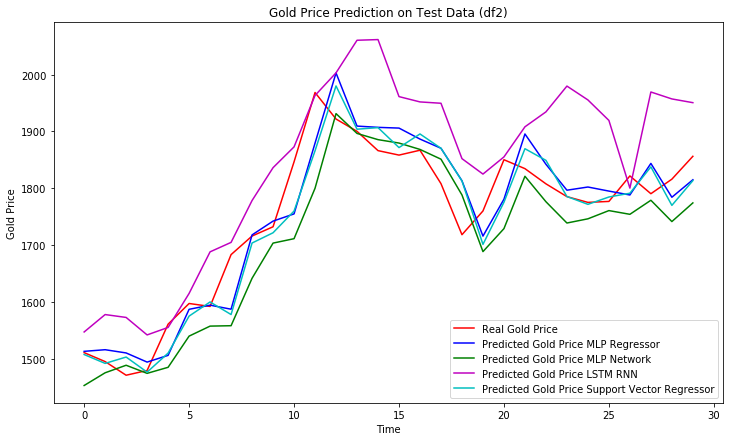

In [662]:
plt.figure(figsize=(12,7))

plt.plot(test1['Price'].values, color = 'red', label = 'Real Gold Price')
plt.plot(predicted_price1, color = 'blue', label = 'Predicted Gold Price MLP Regressor')
plt.plot(nn_pred1, color = 'green', label = 'Predicted Gold Price MLP Network')
plt.plot(lstm_pred1,color = 'm', label = 'Predicted Gold Price LSTM RNN')
plt.plot(svr_pred1,color = 'c', label = 'Predicted Gold Price Support Vector Regressor')
plt.title('Gold Price Prediction on Test Data (df2)')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

### Based on the metrics, the SVR and MLP regressor improve compared to the previous dataset, this might be due to the inclusion of more observations when we dropped oil variable. The data for oil is available from 1986 where as the data for rest of the variables is availab,e from 1978. The LSTM and the MLP network tend to perform worse and show no improvement. Overall, the models have not improved much when it came to predicting the gold prices when we are using df2.